# Heart Disease Health Indicators Dataset
***


## Importing Libraries

In [63]:
#import the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report , confusion_matrix
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

## Load Dataset

In [2]:
dataset = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
dataset

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
dataset.shape

(253680, 22)

In [4]:
dataset.head(10) # top 10 rows

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [5]:
dataset.tail(10) # last 10 rows

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253670,1.0,1.0,1.0,1.0,25.0,0.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
253671,1.0,1.0,1.0,1.0,23.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,4.0,0.0,5.0,0.0,1.0,8.0,3.0,2.0
253672,1.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,2.0,1.0
253673,0.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,14.0,4.0,0.0,1.0,3.0,6.0,8.0
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


## Info of Dataset

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
#number of null values in each column
dataset.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
# is there any null value or not
dataset.isnull().any()

HeartDiseaseorAttack    False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
Diabetes                False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

In [9]:
dataset.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [65]:
dataset["BMI"].value_counts()

27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64

In [68]:
dataset["Education"].value_counts()

6.0    107325
5.0     69910
4.0     62750
3.0      9478
2.0      4043
1.0       174
Name: Education, dtype: int64

## Visualizing Data

### countplot

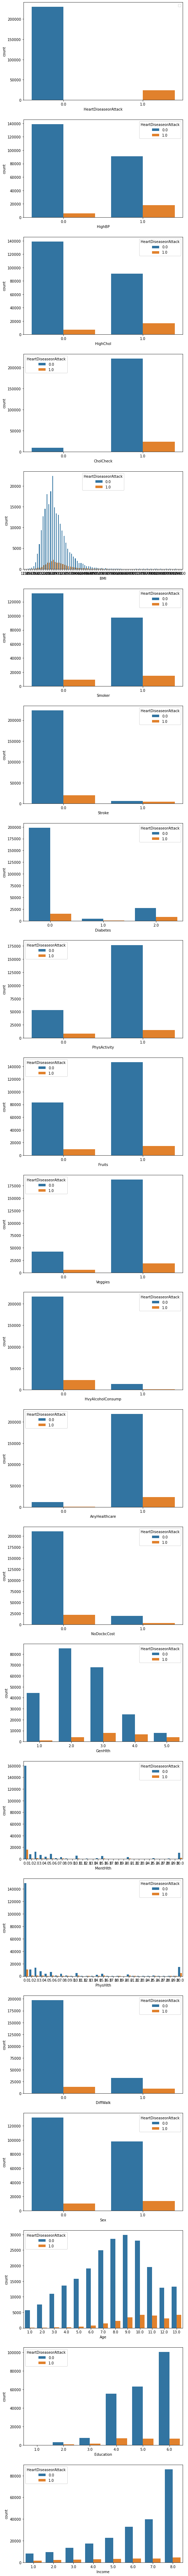

In [11]:
#count plot for each figure 
fig, axes = plt.subplots(nrows=dataset.shape[1] , ncols = 1, figsize=(8,6 * dataset.shape[1]))
for i in range(len(dataset.columns)):
    sns.countplot(x = dataset.columns[i], data = dataset, hue = "HeartDiseaseorAttack", ax = axes[i])
axes[0].legend([])
plt.show()

### histogram

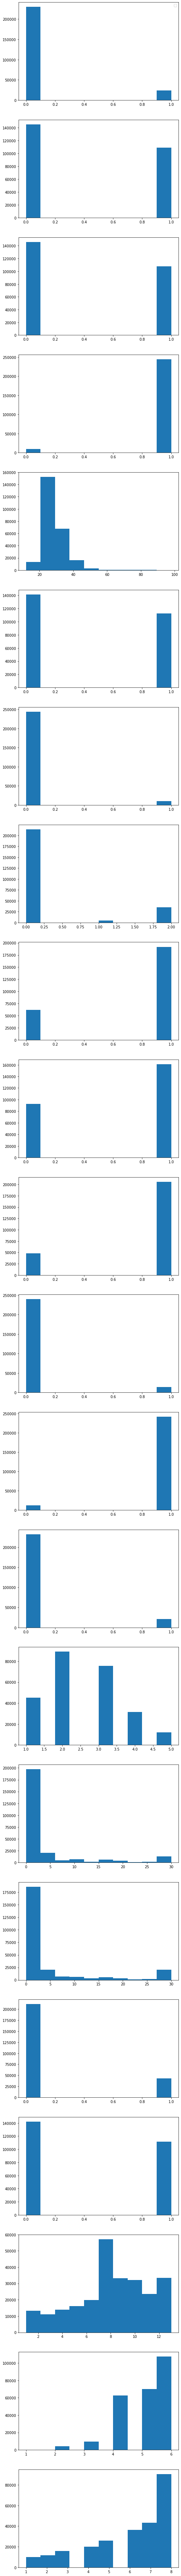

In [12]:
#histogram for each figure
fig, axes = plt.subplots(nrows=dataset.shape[1] , ncols = 1, figsize=(8, 6 * dataset.shape[1]))
for i in range(len(dataset.columns)):
    axes[i].hist(dataset[dataset.columns[i]])
axes[0].legend([])
plt.show()

### displot

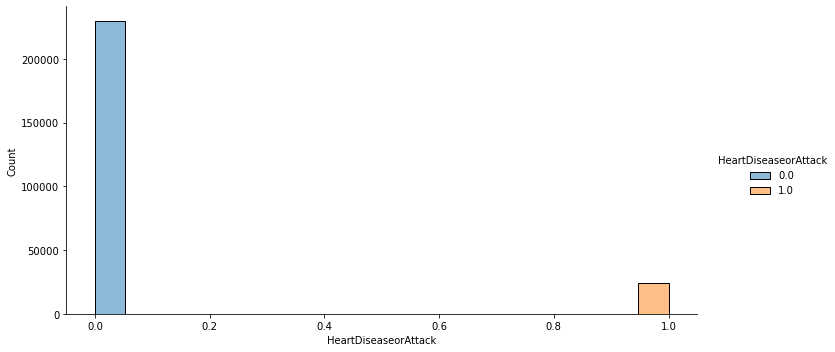

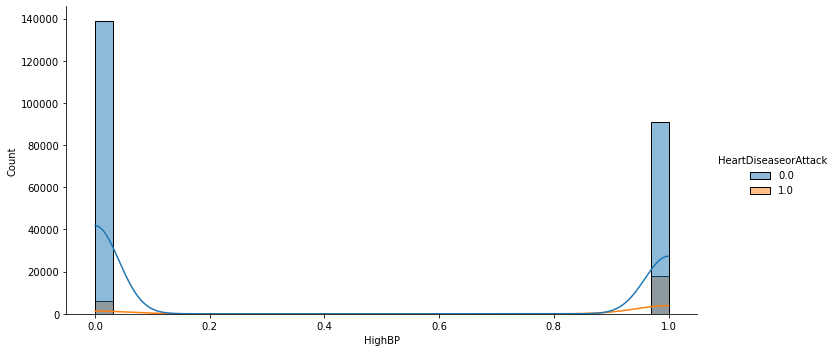

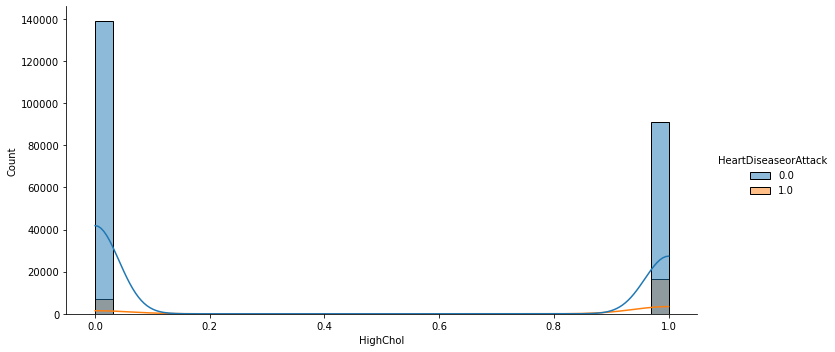

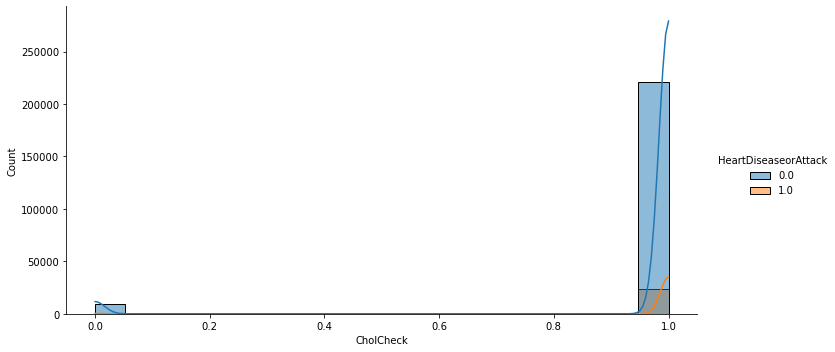

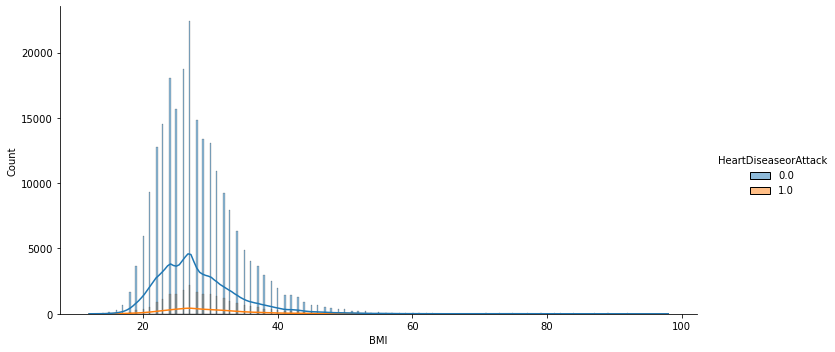

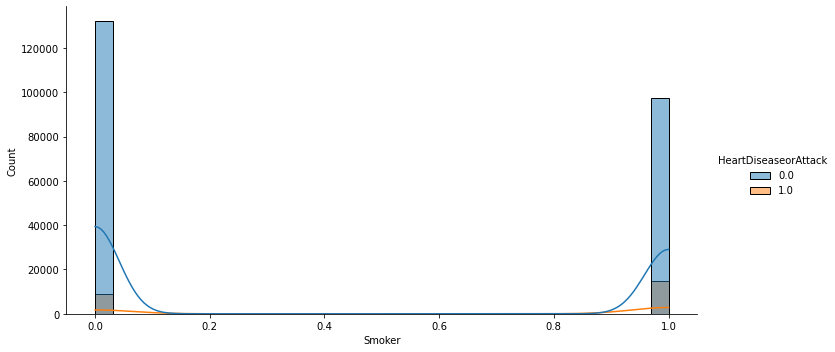

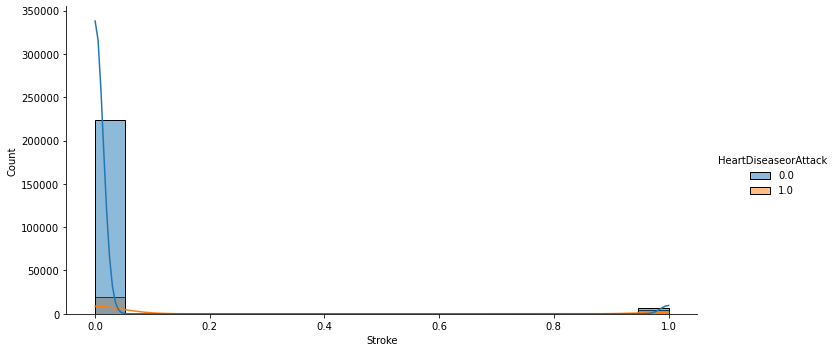

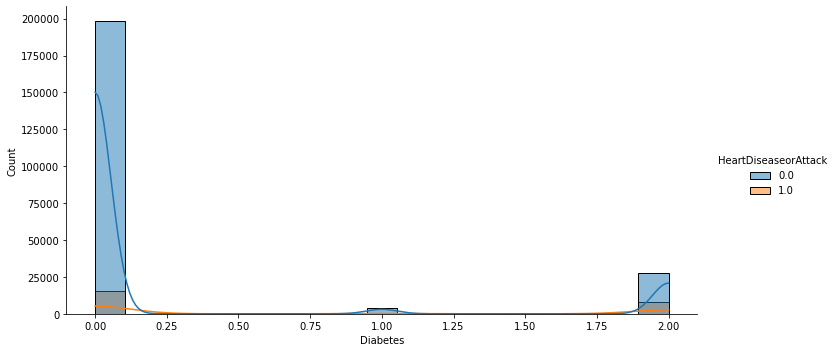

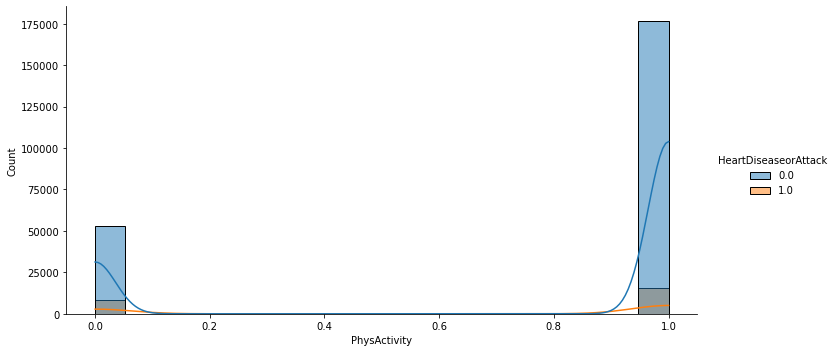

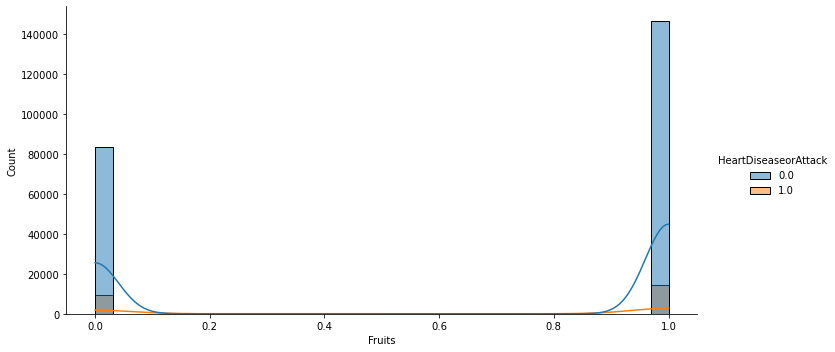

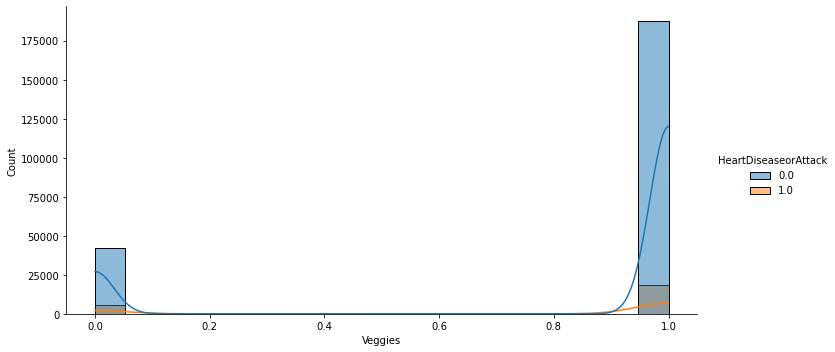

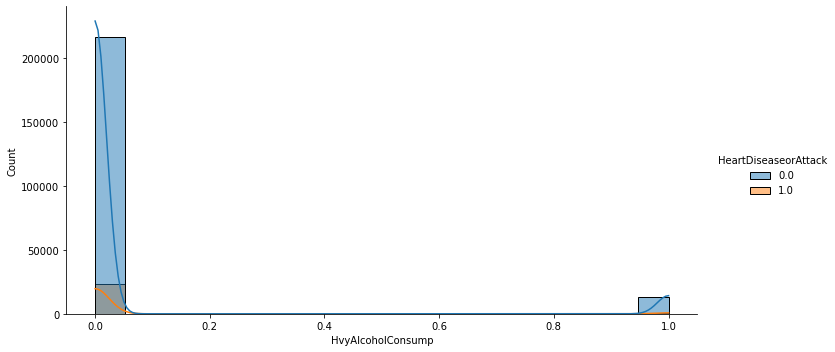

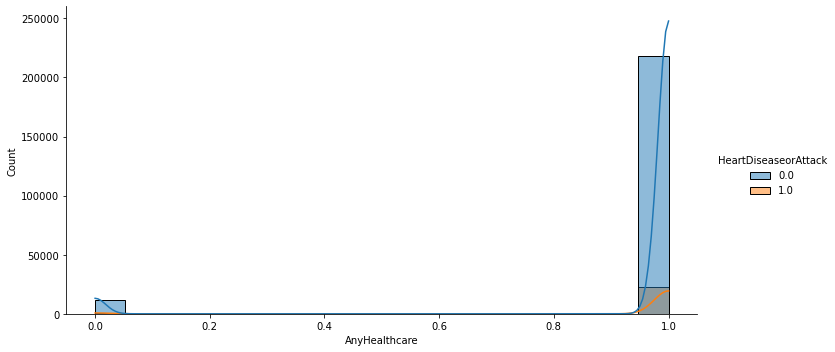

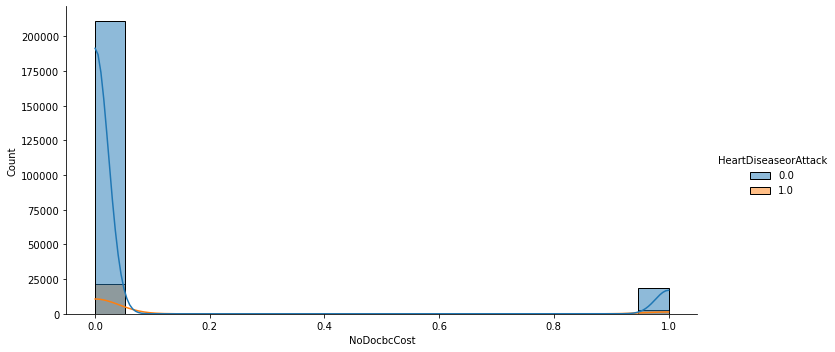

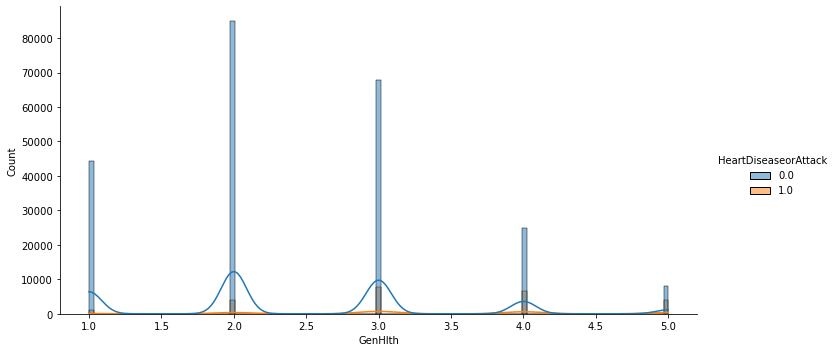

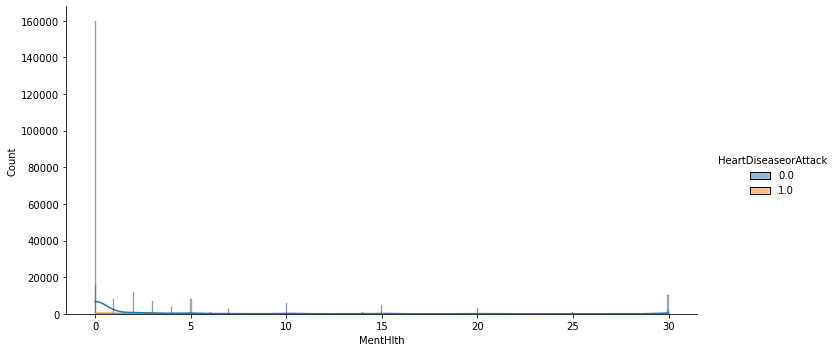

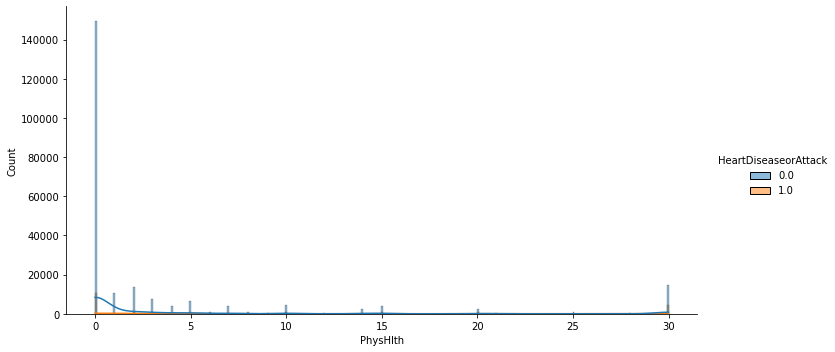

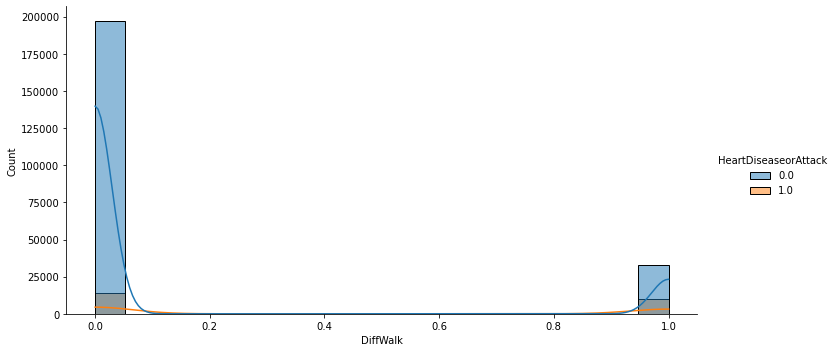

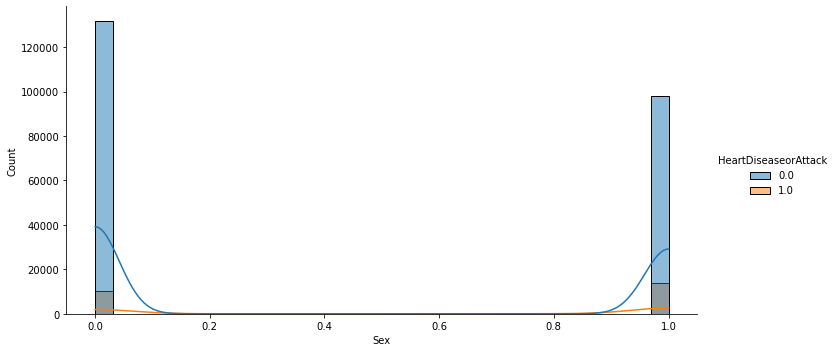

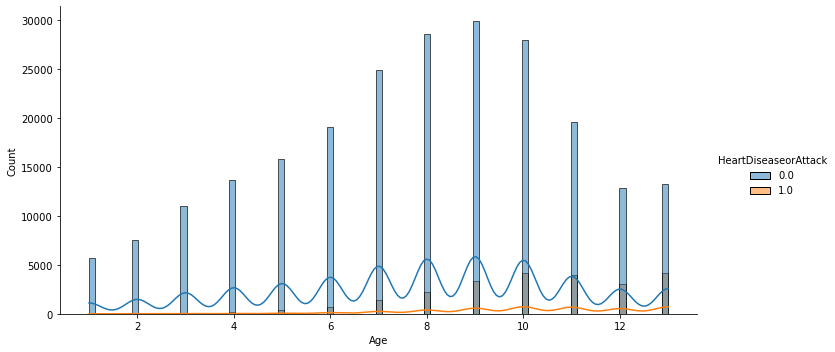

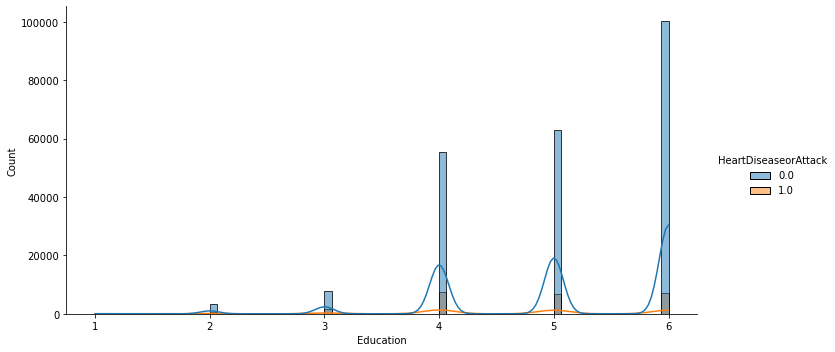

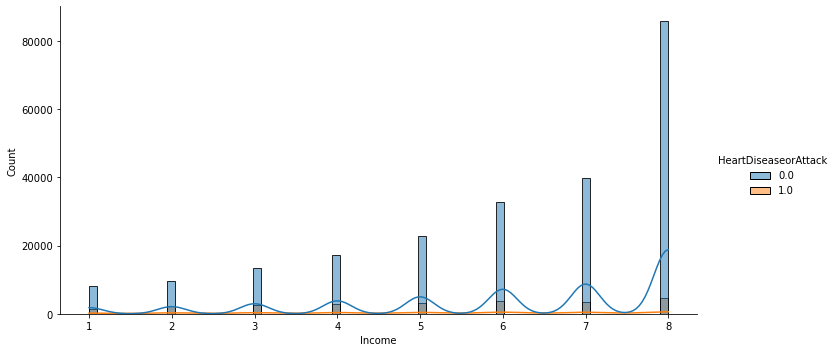

In [13]:
for i in range(len(dataset.columns)):
    sns.displot(dataset , x = dataset.columns[i], hue = "HeartDiseaseorAttack", kde = True, height=5, aspect=2)

## Split X, y

In [14]:
X = dataset.drop(['HeartDiseaseorAttack'], axis = 1)
y = dataset['HeartDiseaseorAttack']

In [15]:
#feature variable
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [16]:
#target variable
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    0.0
253677    0.0
253678    0.0
253679    1.0
Name: HeartDiseaseorAttack, Length: 253680, dtype: float64

In [17]:
print('X shape', X.shape)
print('y shape', y.shape)

X shape (253680, 21)
y shape (253680,)


In [18]:
#number of HeartDiseaseorAttack
y.value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

## Split data to train and test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [20]:
print('X train shape', X_train.shape)
print('y train shape', y_train.shape)

X train shape (177576, 21)
y train shape (177576,)


In [21]:
print('X test shape', X_test.shape)
print('y test shape', y_test.shape)

X test shape (76104, 21)
y test shape (76104,)


## Scaling

### StandandScaler

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Classification

In [24]:
models={
        'LogisticRegression':LogisticRegression(),
        'GaussianNB':GaussianNB(),
        'DecisionTreeClassifier':DecisionTreeClassifier(),
        'RandomForestClassifier':RandomForestClassifier(),
        'KNeighborsClassifier':KNeighborsClassifier()
        }

In [25]:
scores = {}

In [26]:
for i, model in models.items():

    print("model: ", model)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test , y_pred))
    print("-" * 50)
    scores[i] = model.score(X_test,y_test)
    

model:  LogisticRegression()
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     68902
         1.0       0.55      0.13      0.21      7202

    accuracy                           0.91     76104
   macro avg       0.73      0.56      0.58     76104
weighted avg       0.88      0.91      0.88     76104

--------------------------------------------------
model:  GaussianNB()
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.89     68902
         1.0       0.27      0.55      0.36      7202

    accuracy                           0.82     76104
   macro avg       0.61      0.70      0.63     76104
weighted avg       0.88      0.82      0.84     76104

--------------------------------------------------
model:  DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     68902
         1.0       0.24      0.27      0.26      720

In [27]:
from sklearn.svm import SVC

In [28]:
kernels = {'SVC_linear':'linear','SVC_poly':'poly','SVC_rbf':'rbf','SVC_sigmoid':'sigmoid'}

In [29]:
svc = {}

In [30]:
def SVM_fit_score(kernels,  X_train, X_test, y_train, y_test):

    for i, kernel in kernels.items():
        
        print('kernel: ', kernel)
        
        svc[i] = SVC(kernel=kernel).fit(X_train, y_train)
        y_pred = svc[i].predict(X_test)
        
        print(classification_report(y_test , y_pred))
        print('-'*60)
        scores[i] = svc[i].score(X_test,y_test)

In [31]:
#SVM_fit_score(kernels, X_train, X_test, y_train, y_test)

In [32]:
scores = pd.DataFrame(scores, index=['Score']).transpose()
scores

,Score
LogisticRegression,0.907482
GaussianNB,0.818551
DecisionTreeClassifier,0.850363
RandomForestClassifier,0.902252
KNeighborsClassifier,0.896129


In [33]:
scores.sort_values(by = ['Score'], ascending = False, inplace = True)

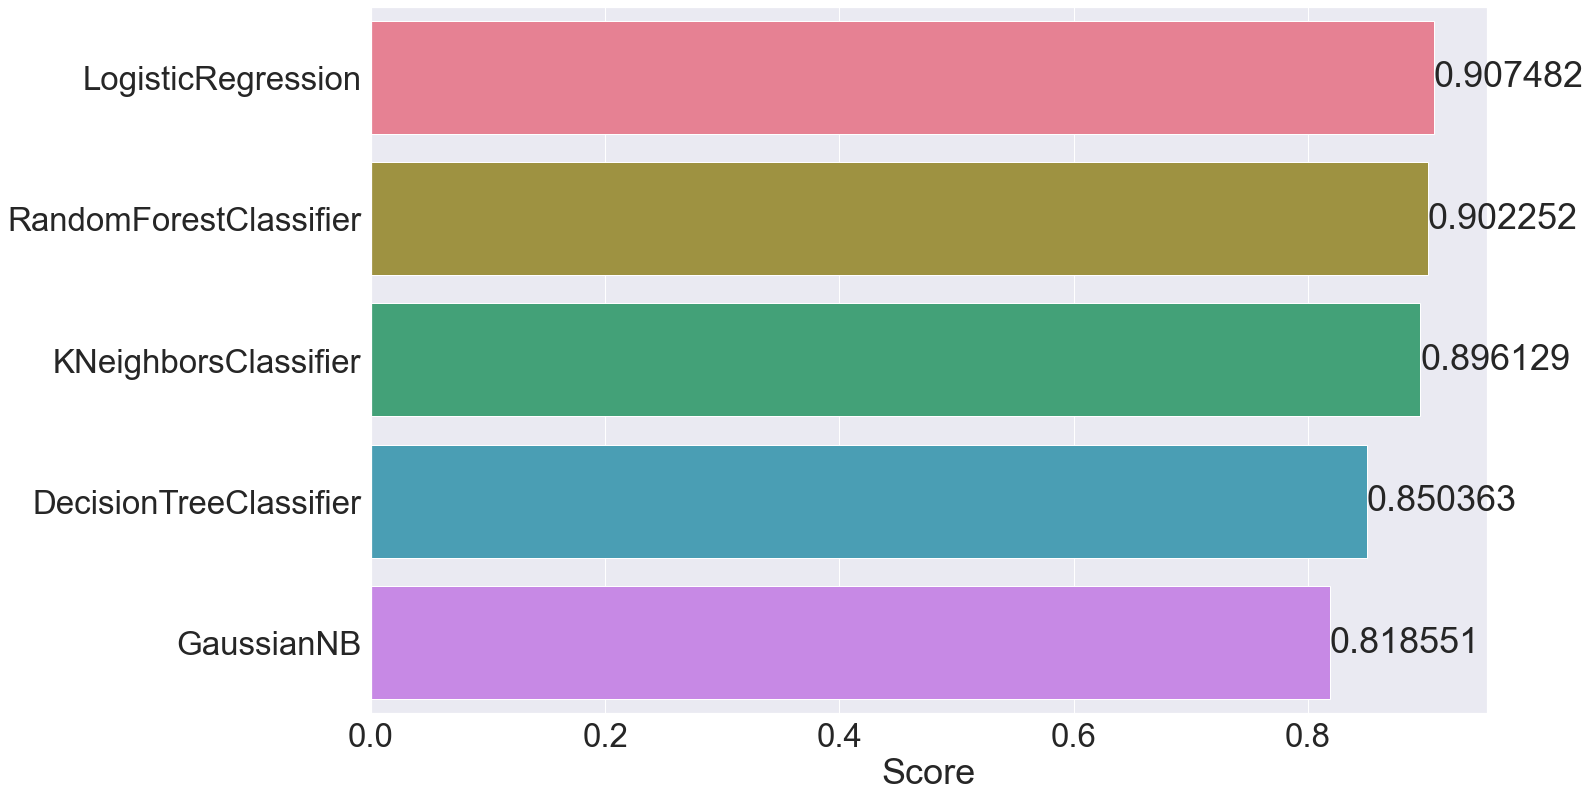

In [69]:
plt.figure(figsize = (20,13))
sns.set(font_scale = 3)
s = sns.barplot(x=scores.Score, y = scores.index, data = scores, palette="husl")
s.bar_label(s.containers[0]);

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
cv_results = cross_val_score(LogisticRegression(), X_train, y_train, cv = kfold, scoring='accuracy')
(cv_results.mean(), cv_results.std())

(0.9078310190918618, 0.00214734898427033)

In [37]:
lr = LogisticRegression().fit(X_train, y_train)

In [38]:
y_pred = lr.predict(X_test)

In [39]:
#Accuracy = TP+TN/TP+FP+FN+TN
print('Accuracy: ', accuracy_score(y_test, y_pred))

#Precision = TP/TP+FP
print('Precision: ', precision_score(y_test, y_pred))

#Recall = TP/TP+FN
print('Recall: ', recall_score(y_test, y_pred))

#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
print('F1 score: ', f1_score(y_test, y_pred))

Accuracy:  0.907481866918953
Precision:  0.5483483483483483
Recall:  0.12677034157178563
F1 score:  0.20593210781549565


In [40]:
lr.score(X_test, y_test)

0.907481866918953

### KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [42]:
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
cv_results = cross_val_score(KNN(), X_train, y_train, cv = kfold, scoring='accuracy')
(cv_results.mean(), cv_results.std())

(0.8969399040568465, 0.001564396672793616)

In [43]:
knn = KNN(n_neighbors=5).fit(X_train, y_train)

In [44]:
y_pred = knn.predict(X_test)

In [45]:
#Accuracy = TP+TN/TP+FP+FN+TN
print('Accuracy: ', accuracy_score(y_test, y_pred))

#Precision = TP/TP+FP
print('Precision: ', precision_score(y_test, y_pred))

#Recall = TP/TP+FN
print('Recall: ', recall_score(y_test, y_pred))

#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
print('F1 score: ', f1_score(y_test, y_pred))

Accuracy:  0.8961289813938821
Precision:  0.37722668529514497
Recall:  0.14995834490419327
F1 score:  0.21460506706408344


In [46]:
knn.score(X_test, y_test)

0.8961289813938821

### Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB 

In [48]:
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
cv_results = cross_val_score(GaussianNB(), X_train, y_train, cv = kfold, scoring='accuracy')
(cv_results.mean(), cv_results.std())

(0.817610543643133, 0.003973771992141335)

In [49]:
gnb = GaussianNB().fit(X_train, y_train)

In [50]:
y_pred = gnb.predict(X_test)

In [51]:
#Accuracy = TP+TN/TP+FP+FN+TN
print('Accuracy: ', accuracy_score(y_test, y_pred))

#Precision = TP/TP+FP
print('Precision: ', precision_score(y_test, y_pred))

#Recall = TP/TP+FN
print('Recall: ', recall_score(y_test, y_pred))

#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
print('F1 score: ', f1_score(y_test, y_pred))

Accuracy:  0.8185509303058972
Precision:  0.271999447856995
Recall:  0.5472091085809497
F1 score:  0.3633765156055507


In [52]:
gnb.score(X_test, y_test)

0.8185509303058972

### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
cv_results = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv = kfold, scoring='accuracy')
(cv_results.mean(), cv_results.std())

(0.8503007327532265, 0.0024002094338540078)

In [55]:
dt = DecisionTreeClassifier().fit(X_train, y_train)

In [56]:
y_pred = dt.predict(X_test)

In [57]:
#Accuracy = TP+TN/TP+FP+FN+TN
print('Accuracy: ', accuracy_score(y_test, y_pred))

#Precision = TP/TP+FP
print('Precision: ', precision_score(y_test, y_pred))

#Recall = TP/TP+FN
print('Recall: ', recall_score(y_test, y_pred))

#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
print('F1 score: ', f1_score(y_test, y_pred))

Accuracy:  0.8495611268790076
Precision:  0.23896742470805163
Recall:  0.2699250208275479
F1 score:  0.25350459672686965


### Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
cv_results = cross_val_score(RandomForestClassifier(), X_train, y_train, cv = kfold, scoring='accuracy')
(cv_results.mean(), cv_results.std())

(0.9035117438652275, 0.0015252092803236742)

In [60]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [61]:
y_pred = rf.predict(X_test)

In [62]:
#Accuracy = TP+TN/TP+FP+FN+TN
print('Accuracy: ', accuracy_score(y_test, y_pred))

#Precision = TP/TP+FP
print('Precision: ', precision_score(y_test, y_pred))

#Recall = TP/TP+FN
print('Recall: ', recall_score(y_test, y_pred))

#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
print('F1 score: ', f1_score(y_test, y_pred))

Accuracy:  0.9023047408808998
Precision:  0.43588332416070447
Recall:  0.10996945292974174
F1 score:  0.17562922718704954
